In [3]:
%matplotlib inline
from importlib import reload
import sys
sys.path.append('/global/homes/c/cramirez/Codes/LyaPlotter')
from module_lyacolore_multifile_cached import CoLoReSim, LyaCoLoReSim, Plotter, Computations, QuickQuasarsSim
import glob
import logging
import matplotlib.pyplot as plt
import numpy as np


#logging.disable()
logging.basicConfig(level=logging.INFO, stream=sys.stdout)
log = logging.getLogger('Playground')
#logger = logging.getLogger()
#logger.setLevel(logging.DEBUG)Ç

location_CoL = '/global/cscratch1/sd/cramirez/reproduce_london/CoLoRe'
location_2LPT = '/project/projectdirs/desi/users/jfarr/2LPT_mocks_hack/'
location_Lya = '/global/cscratch1/sd/cramirez/reproduce_london/LyaCoLoRe'
location_QQ = '/global/cscratch1/sd/cramirez/reproduce_london/QuickQuasars'

## CoLoRe Plotter

We use the searcher to search simulations in the ``location_Col`` path. For each simulations a simulation object is created.

In [4]:
CoLoRe_sims = []
for i, path in enumerate(CoLoReSim.search(location_2LPT)):
    CoLoRe_sims.append( CoLoReSim(i,path))
    print(CoLoRe_sims[i])

CoLoRe sim. Id: 0	Name: CoLoRe_4096_Gaussian	Path: /project/projectdirs/desi/users/jfarr/2LPT_mocks_hack/CoLoRe_4096_Gaussian
CoLoRe sim. Id: 1	Name: CoLoRe_4096_2LPT	Path: /project/projectdirs/desi/users/jfarr/2LPT_mocks_hack/CoLoRe_4096_2LPT


In [5]:
x1 = CoLoRe_sims[0]
x2 = CoLoRe_sims[1]


c_file_1 = x1.get_Sources(ifiles=[0], lr_max=1200.)
c_file_2 = x2.get_Sources(ifiles=[0], lr_max=1200.)

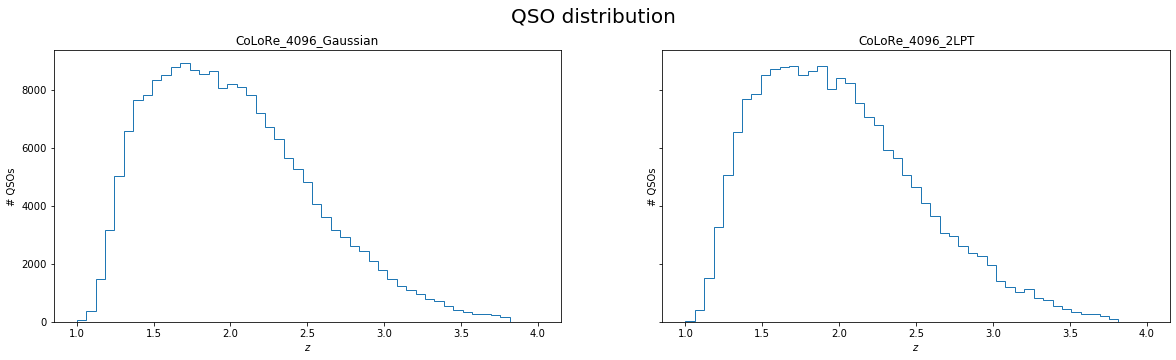

In [8]:
fig1, ax_array = plt.subplots(1,2, sharex=False, sharey=True, figsize=(20,5))
ax1, ax2 = ax_array
_1 = c_file_1.plot_qso_dist(ax=ax1)
_2 = c_file_2.plot_qso_dist(ax=ax2)
ax1.set_title(x1.__name__)
ax2.set_title(x2.__name__)
plt.suptitle('QSO distribution', fontsize=20, y=1)
plt.show()

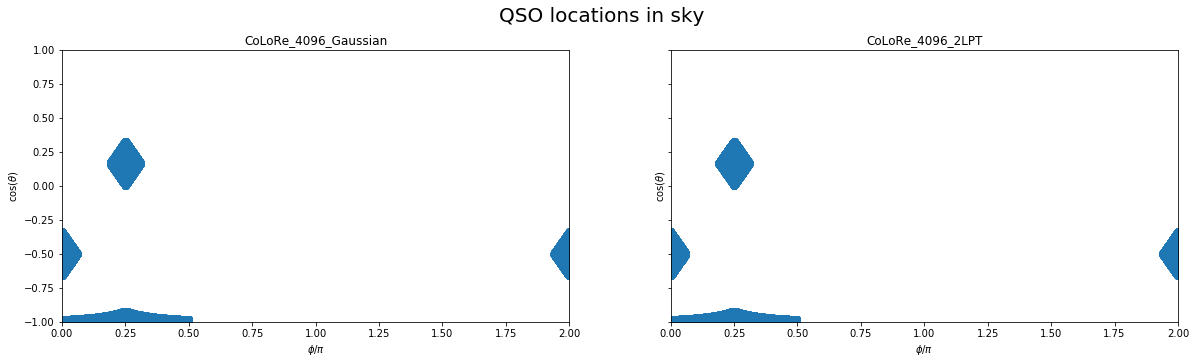

In [9]:
fig2, ax_array = plt.subplots(1,2, sharex=False, sharey=True, figsize=(20,5))
ax1, ax2 = ax_array
_1 = c_file_1.plot_locations(ax=ax1)
_2 = c_file_2.plot_locations(ax=ax2)
ax1.set_title(x1.__name__)
ax2.set_title(x2.__name__)
plt.suptitle('QSO locations in sky', fontsize=20, y=1)
plt.show()

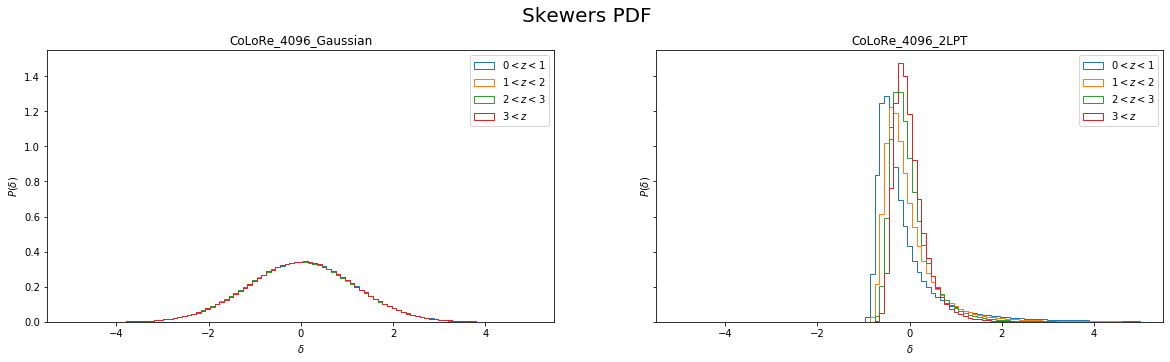

In [11]:
fig3, ax_array = plt.subplots(1,2, sharex=False, sharey=True, figsize=(20,5))
ax1, ax2 = ax_array
_1 = c_file_1.plot_pdf(c_file_1.delta_skewers, ax=ax1)
_2 = c_file_2.plot_pdf(c_file_2.delta_skewers, ax=ax2)
ax1.set_title(x1.__name__)
ax2.set_title(x2.__name__)
plt.suptitle('Skewers PDF', fontsize=20, y=1)
plt.show()

### Plotting deltas

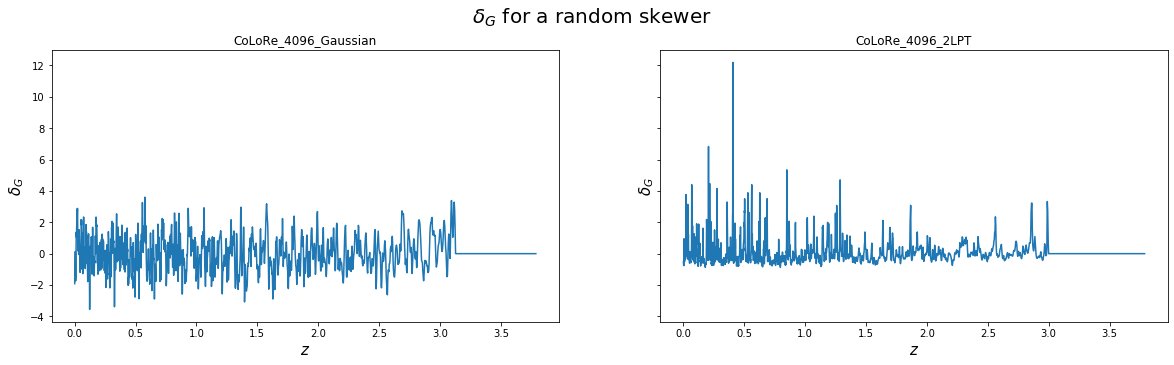

In [14]:
fig4, ax_array = plt.subplots(1,2, sharex=False, sharey=True, figsize=(20,5))
ax1, ax2 = ax_array
_1 = c_file_1.single_skewer(c_file_1.delta_skewers, ax=ax1, mockid=0)
_2 = c_file_2.single_skewer(c_file_2.delta_skewers, ax=ax2, mockid=0)
ax1.set_title(x1.__name__)
ax2.set_title(x2.__name__)
[ax.set_xlabel('$z$', fontsize=15) for ax in ax_array]
[ax.set_ylabel('$\delta_G$', fontsize=15) for ax in ax_array]
plt.suptitle('$\delta_G$ for a random skewer', fontsize=20, y=1)
plt.show()

Mean over all pixels = 0.013026460073888302
Mean over all pixels = 0.006811579689383507


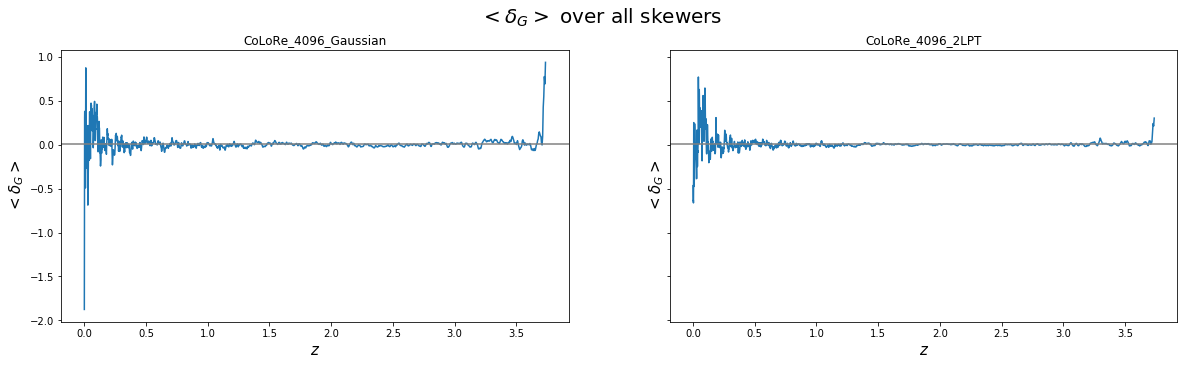

In [16]:
fig5, ax_array = plt.subplots(1,2, sharex=False, sharey=True, figsize=(20,5))
ax1, ax2 = ax_array
_1 = c_file_1.mean_all_skewers(c_file_1.delta_skewers, ax=ax1)
_2 = c_file_2.mean_all_skewers(c_file_2.delta_skewers, ax=ax2)
ax1.set_title(x1.__name__)
ax2.set_title(x2.__name__)

for ax in ax_array:
    ax.set_xlabel('$z$', fontsize=15)
    ax.set_ylabel('$< \delta_G >$', fontsize=15)
plt.suptitle('$< \delta_G >$ over all skewers', fontsize=20, y=1)
plt.show()

Std over all pixels = 1.1613
Std over all pixels = 1.0396


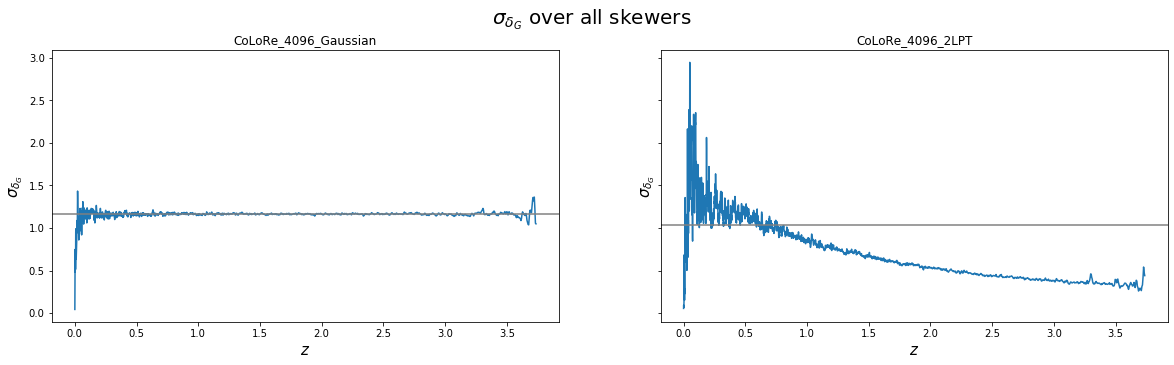

In [17]:
fig6, ax_array = plt.subplots(1,2, sharex=False, sharey=True, figsize=(20,5))
ax1, ax2 = ax_array
_1 = c_file_1.std_all_skewers(c_file_1.delta_skewers, ax=ax1)
_2 = c_file_2.std_all_skewers(c_file_2.delta_skewers, ax=ax2)

ax1.set_title(x1.__name__)
ax2.set_title(x2.__name__)
for ax in ax_array:
    ax.set_xlabel('$z$', fontsize=15)
    ax.set_ylabel('$\sigma_{\delta_G}$', fontsize=15)
plt.suptitle('$\sigma_{\delta_G}$ over all skewers', fontsize=20, y=1)
plt.show()

### Plotting radial velocity

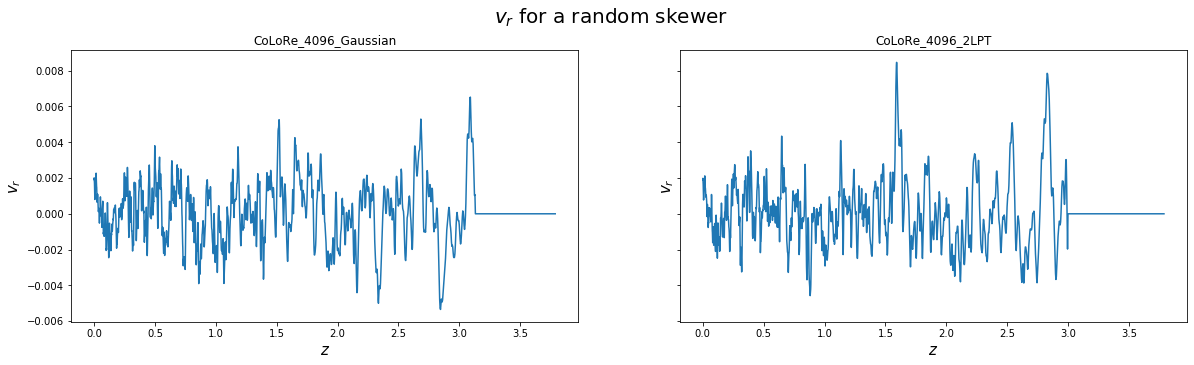

In [18]:
fig7, ax_array = plt.subplots(1,2, sharex=False, sharey=True, figsize=(20,5))
ax1, ax2 = ax_array
_1 = c_file_1.single_skewer(c_file_1.vrad, ax=ax1, mockid=0)
_2 = c_file_2.single_skewer(c_file_2.vrad, ax=ax2, mockid=0)

ax1.set_title(x1.__name__)
ax2.set_title(x2.__name__)
for ax in ax_array:
    ax.set_xlabel('$z$', fontsize=15)
    ax.set_ylabel('$ v_r$', fontsize=15)
plt.suptitle('$v_r$ for a random skewer', fontsize=20, y=1)
plt.show()

Mean over all pixels = 4.587470175465569e-05
Mean over all pixels = 4.8778198106447235e-05


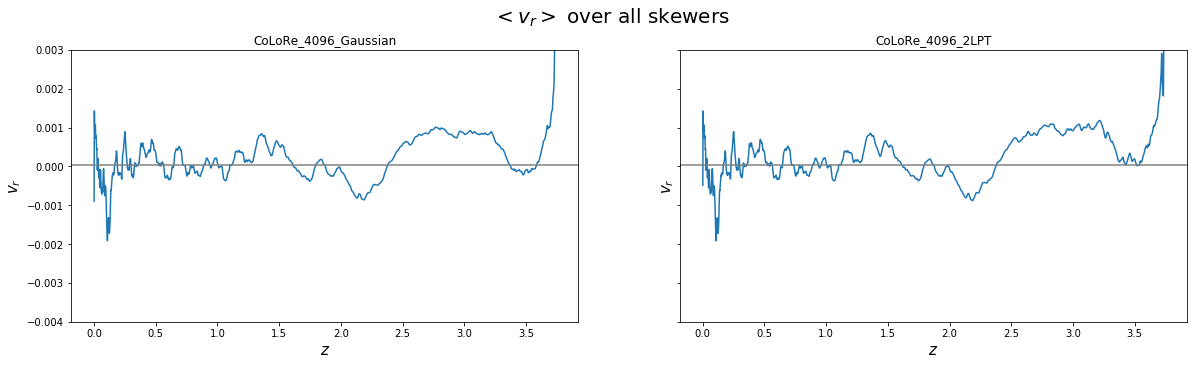

In [20]:
fig8, ax_array = plt.subplots(1,2, sharex=False, sharey=True, figsize=(20,5))
ax1, ax2 = ax_array
_1 = c_file_1.mean_all_skewers(c_file_1.vrad, ax=ax1)
_2 = c_file_2.mean_all_skewers(c_file_2.vrad, ax=ax2)
ax1.set_ylim(-0.004,0.003)

ax1.set_title(x1.__name__)
ax2.set_title(x2.__name__)
for ax in ax_array:
    ax.set_xlabel('$z$', fontsize=15)
    ax.set_ylabel('$ v_r$', fontsize=15)
plt.suptitle('$< v_r >$ over all skewers', fontsize=20, y=1)
plt.show()

Std over all pixels = 0.0072
Std over all pixels = 0.0064


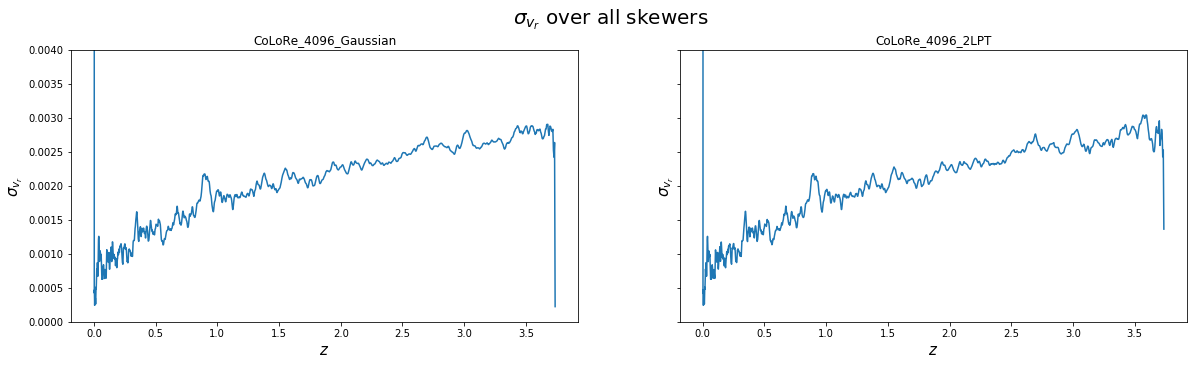

In [21]:
fig9, ax_array = plt.subplots(1,2, sharex=False, sharey=True, figsize=(20,5))
ax1, ax2 = ax_array
_1 = c_file_1.std_all_skewers(c_file_1.vrad, ax=ax1)
_2 = c_file_2.std_all_skewers(c_file_2.vrad, ax=ax2)
ax1.set_ylim(0,0.004)

ax1.set_title(x1.__name__)
ax2.set_title(x2.__name__)
for ax in ax_array:
    ax.set_xlabel('$z$', fontsize=15)
    ax.set_ylabel('$\sigma_{v_r}$', fontsize=15)
plt.suptitle('$\sigma_{v_r}$ over all skewers', fontsize=20, y=1)
plt.show()

# LyaCoLoRe Plotter

In [23]:
%reset

%matplotlib inline
from importlib import reload
from module_lyacolore_multifile_cached import LyaCoLoReSim, Plotter, Computations, QuickQuasarsSim, CoLoReSim
import glob
import logging
import sys
import matplotlib.pyplot as plt
import numpy as np

#logging.disable()
logging.basicConfig(level=logging.INFO, stream=sys.stdout)
log = logging.getLogger('Playground')
#logger = logging.getLogger()
#logger.setLevel(logging.DEBUG)Ç

location_CoL = '/global/cscratch1/sd/cramirez/reproduce_london/CoLoRe'
location_Lya = '/global/cscratch1/sd/cramirez/reproduce_london/LyaCoLoRe'
location_QQ = '/global/cscratch1/sd/cramirez/reproduce_london/QuickQuasars'

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [35]:
LyaCoLoRe_sims = []
for i,path in enumerate(LyaCoLoReSim.search(location_Lya)):
    LyaCoLoRe_sims.append( LyaCoLoReSim(i,path))
    print(LyaCoLoRe_sims[i])

LyaCoLoRe sim. Id: 0	Name: lyacolore_example	Path: /global/cscratch1/sd/cramirez/reproduce_london/LyaCoLoRe/lyacolore_example
LyaCoLoRe sim. Id: 1	Name: my_example	Path: /global/cscratch1/sd/cramirez/reproduce_london/LyaCoLoRe/my_example
LyaCoLoRe sim. Id: 2	Name: jfarr_script_compres_True_20200428080218	Path: /global/cscratch1/sd/cramirez/reproduce_london/LyaCoLoRe/jfarr_script_compres_True_20200428080218
LyaCoLoRe sim. Id: 3	Name: full_example	Path: /global/cscratch1/sd/cramirez/reproduce_london/LyaCoLoRe/full_example
LyaCoLoRe sim. Id: 4	Name: full_example_less_pixels	Path: /global/cscratch1/sd/cramirez/reproduce_london/LyaCoLoRe/full_example_less_pixels
LyaCoLoRe sim. Id: 5	Name: lyacolore_sh_with_my_colore	Path: /global/cscratch1/sd/cramirez/reproduce_london/LyaCoLoRe/lyacolore_sh_with_my_colore
LyaCoLoRe sim. Id: 6	Name: bble_transmission_only_true_20200504045822	Path: /global/cscratch1/sd/cramirez/reproduce_london/LyaCoLoRe/bble_transmission_only_true_20200504045822
LyaCoLoRe si

In [36]:
x = {}
x[1] = LyaCoLoRe_sims[7]
x[2] = LyaCoLoRe_sims[8]
x[2].__name__ = 'LyaCoLoRe 2LPT 4096'
x[1].__name__ = 'LyaCoLoRe Gaussian 4096'

In [39]:
for item in x.values():
    item.transmission = item.get_Transmission(pixels=[1,2])
    item.colore       = item.get_GaussianCoLoRe(pixels=[1,2])

## Mean flux Std of flux

Mean over all pixels = 0.8419442772865295
Mean over all pixels = 0.8400554060935974


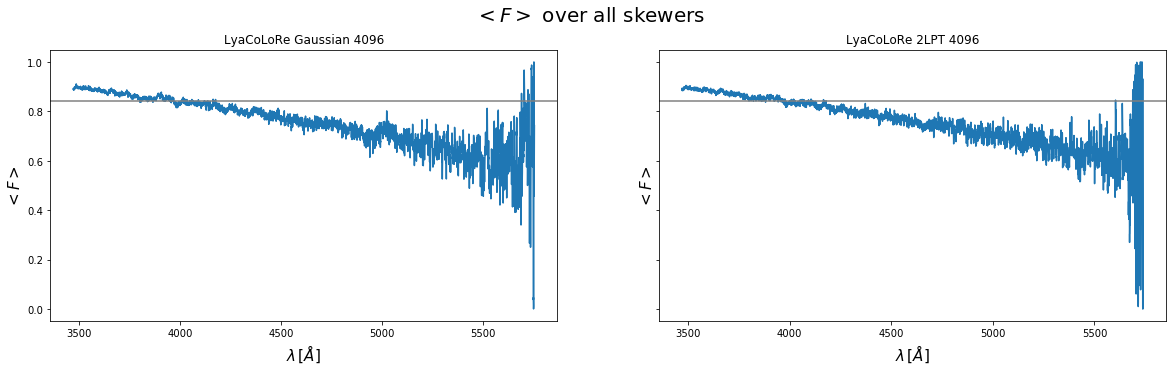

In [44]:
fig6, ax_array = plt.subplots(1,2, sharex=False, sharey=True, figsize=(20,5))
x[1].ax, x[2].ax = ax_array

for item in x.values():
    item.transmission.mean_all_skewers(item.transmission.lya_absorption, item.transmission.wavelength, ax=item.ax)
    item.ax.set_title(item.__name__)
    item.ax.set_ylabel('$<F>$', fontsize=15)
    item.ax.set_xlabel('$\lambda \, [\AA]$', fontsize=15)
plt.suptitle('$<F>$ over all skewers', fontsize=20, y=1)
plt.show()

Std over all pixels = 0.2853
Std over all pixels = 0.2847


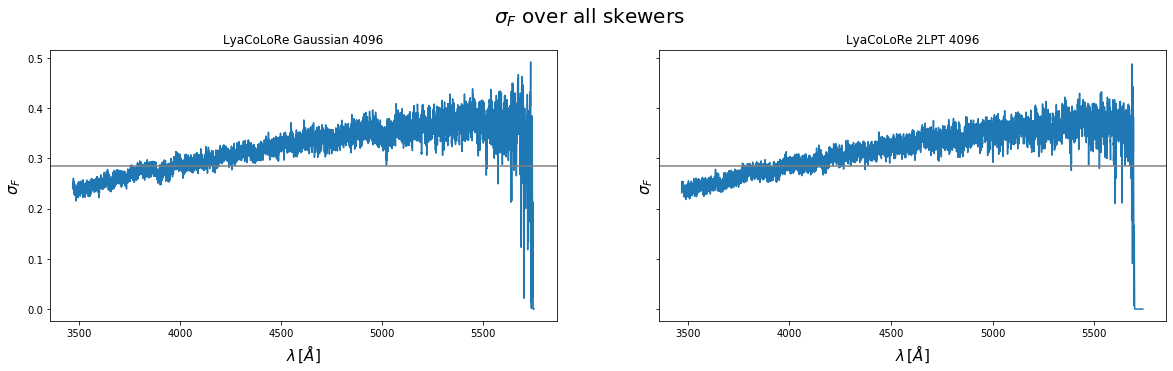

In [46]:
fig6, ax_array = plt.subplots(1,2, sharex=False, sharey=True, figsize=(20,5))
x[1].ax, x[2].ax = ax_array

for item in x.values():
    item.transmission.std_all_skewers(item.transmission.lya_absorption, item.transmission.wavelength, ax=item.ax)
    item.ax.set_title(item.__name__)
    item.ax.set_ylabel('$\sigma_F$', fontsize=15)
    item.ax.set_xlabel('$\lambda \, [\AA]$', fontsize=15)
plt.suptitle('$\sigma_F$ over all skewers', fontsize=20, y=1)
plt.show()

## Delta of flux: 
$$ \delta_F = \frac{F}{\overline{F}}$$

Mean over all pixels = 0.9126914739608765
Mean over all pixels = 0.9121683835983276


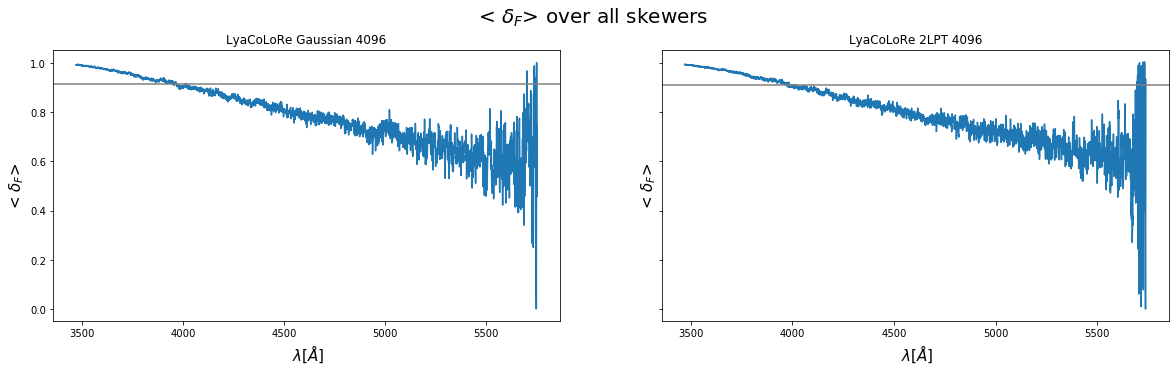

In [48]:
fig6, ax_array = plt.subplots(1,2, sharex=False, sharey=True, figsize=(20,5))
x[1].ax, x[2].ax = ax_array

for item in x.values():
    item.transmission.mean_all_skewers(item.transmission.delta_lya_absorption, item.transmission.wavelength, ax=item.ax)
    item.ax.set_title(item.__name__)
    item.ax.set_ylabel('< $\delta_F$>', fontsize=15)
    item.ax.set_xlabel(' $\lambda [\AA]$', fontsize=15)
plt.suptitle('< $\delta_F$> over all skewers', fontsize=20, y=1)
plt.show()

Std over all pixels = 0.3114
Std over all pixels = 0.3115


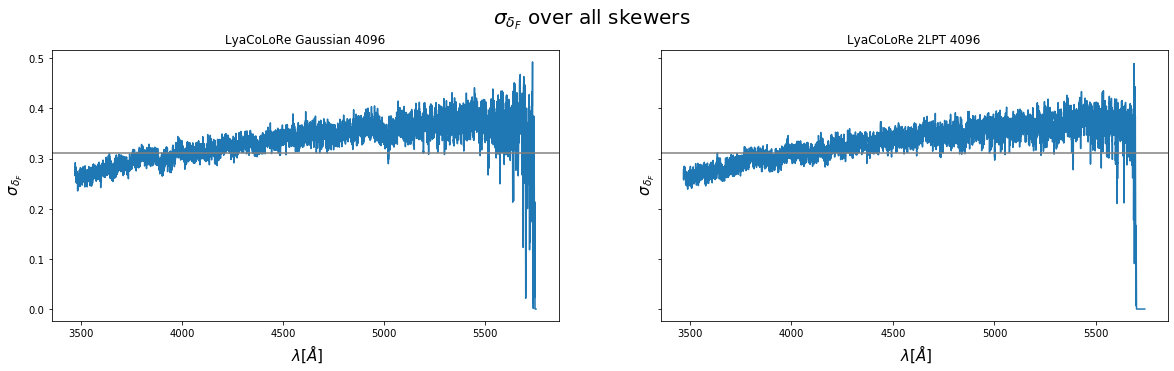

In [49]:
fig6, ax_array = plt.subplots(1,2, sharex=False, sharey=True, figsize=(20,5))
x[1].ax, x[2].ax = ax_array

for item in x.values():
    item.transmission.std_all_skewers(item.transmission.delta_lya_absorption, item.transmission.wavelength, ax=item.ax)
    item.ax.set_title(item.__name__)
    item.ax.set_ylabel(' $\sigma_{\delta_F}$', fontsize=15)
    item.ax.set_xlabel(' $\lambda [\AA]$', fontsize=15)
plt.suptitle('$\sigma_{\delta_F}$ over all skewers', fontsize=20, y=1)
plt.show()

## JFarr plot with stages

In [51]:
for item in x.values():
    item.a= item.picca_gaussian_colorecell = item.get_PiccaStyleFiles('picca-gaussian-colorecell')
    item.b= item.picca_gaussian            = item.get_PiccaStyleFiles('picca-gaussian')
    item.c= item.picca_density             = item.get_PiccaStyleFiles('picca-density')
    item.d= item.picca_tau_no_RSD          = item.get_PiccaStyleFiles('picca-tau-noRSD-notnorm')
    item.e= item.picca_tau_notnorm         = item.get_PiccaStyleFiles('picca-tau-notnorm')
    item.f= item.picca_flux_noRSD_notnorm  = item.get_PiccaStyleFiles('picca-flux-noRSD-notnorm')
    item.g= item.picca_flux_notnorm        = item.get_PiccaStyleFiles('picca-flux-notnorm')

In [75]:
x[1].mockid = 55535
x[2].mockid = 43815

In [54]:
colours = ['#F5793A','#A95AA1','#85C0F9','#0F2080']
for item in x.values():
    item.a.style = {'c': colours[0], 'ls': '--', 'label':'$\delta_C$'}
    item.b.style = {'c': colours[0], 'ls': '-', 'label':'$\delta_G$'}
    item.c.style = {'c': colours[1], 'ls': '-', 'label':'$1+\delta$'}
    item.d.style = {'c': colours[2], 'ls': ':', 'label':'$ \\tau_{noRSD}$'}
    item.e.style = {'c': colours[2], 'ls': '-', 'label':'$ \\tau $'}
    item.f.stlye = {'c': colours[3], 'ls': ':', 'label':'$ \\tau_{norsd}notnorm$'}
    item.g.style = {'c': colours[3], 'ls': '-', 'label':'$F$'}

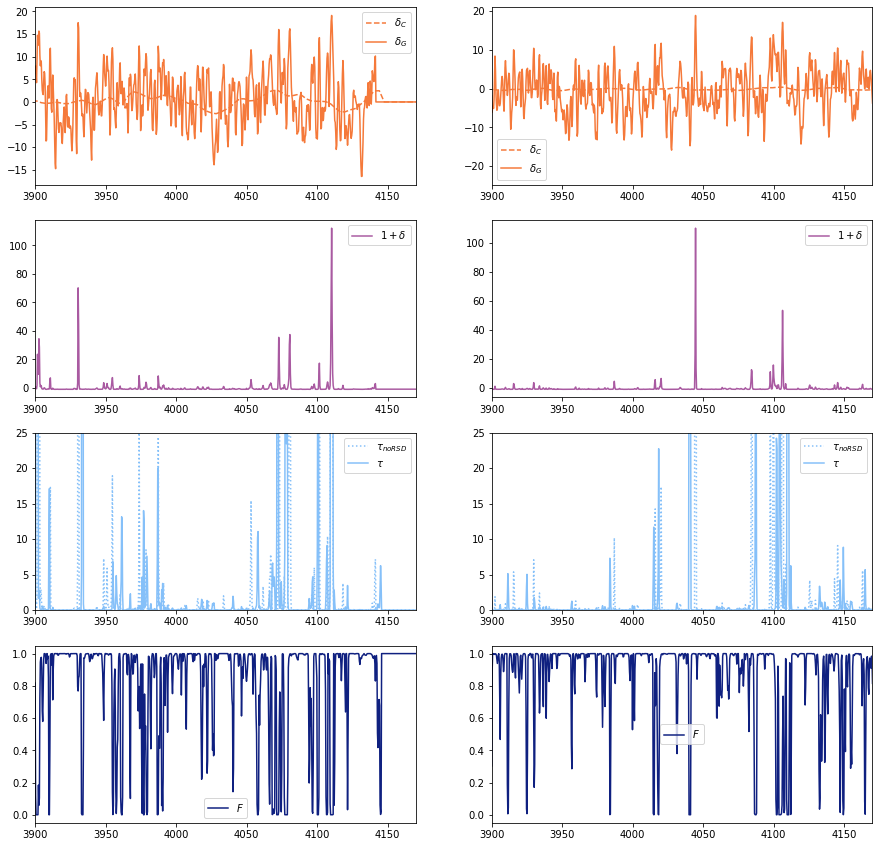

In [77]:
fig, ax_array = plt.subplots(4,2 , figsize=(15,15))
x[1].ax_array = ax_array[:,0]
x[2].ax_array = ax_array[:,1]
for item in x.values():
    ax1, ax2,ax3,ax4 = item.ax_array
    
    item.a.single_skewer(item.a.values, item.a.wavelength, ax=ax1, mockid = item.mockid, **item.a.style)
    item.b.single_skewer(item.b.values, item.b.wavelength, ax=ax1, mockid = item.mockid, **item.b.style)
    item.c.single_skewer(item.c.values, item.c.wavelength, ax=ax2, mockid = item.mockid, **item.c.style)
    item.d.single_skewer(item.d.values, item.d.wavelength, ax=ax3, mockid = item.mockid, **item.d.style)
    item.e.single_skewer(item.e.values, item.e.wavelength, ax=ax3, mockid = item.mockid, **item.e.style)
    item.g.single_skewer(item.g.values, item.g.wavelength, ax=ax4, mockid = item.mockid, **item.g.style)
    
    ax3.set_ylim(0,25)
    for axis in item.ax_array:
        axis.set_xlim(3900,4170)
    
    ax1.legend()
    ax2.legend()
    ax3.legend()
    ax4.legend()
plt.show()


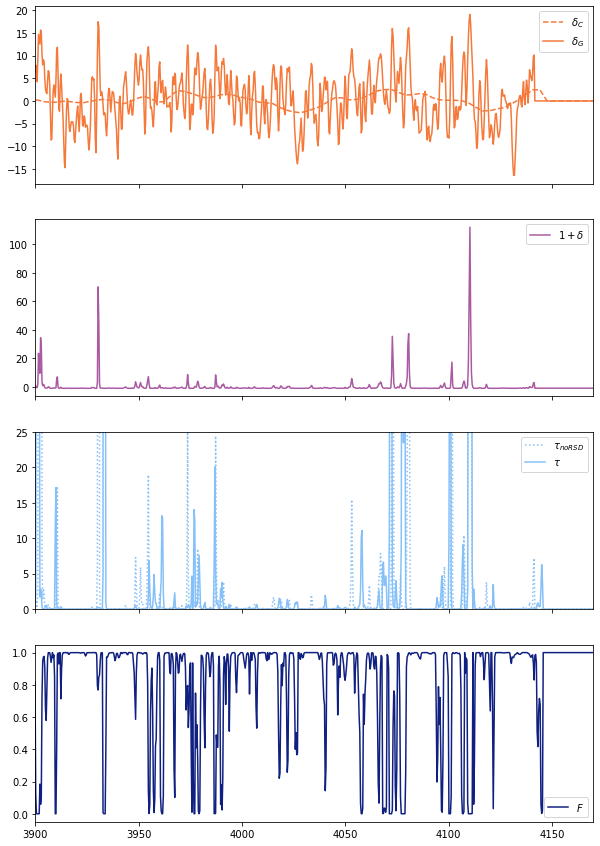

In [31]:
fig, ax_array = plt.subplots(4,1 , sharex=True, sharey=False, figsize=(10,15))
ax1, ax2, ax3,ax4 = ax_array
a.single_skewer(a.values, a.wavelength, ax=ax1, mockid = mockid, **a.style)
b.single_skewer(b.values, b.wavelength, ax=ax1, mockid = mockid, **b.style)
c.single_skewer(c.values, c.wavelength, ax=ax2, mockid = mockid, **c.style)
d.single_skewer(d.values, d.wavelength, ax=ax3, mockid = mockid, **d.style)
e.single_skewer(e.values, e.wavelength, ax=ax3, mockid = mockid, **e.style)
g.single_skewer(g.values, g.wavelength, ax=ax4, mockid = mockid, **g.style)
ax1.set_xlim(3900,4170)
ax3.set_ylim(0,25)
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
plt.show()

# QuickQuasars Plotter

In [32]:
QuickQuasars_sims = []
for i,path in enumerate(QuickQuasarsSim.search(location_QQ)):
    QuickQuasars_sims.append( QuickQuasarsSim(i,path,compression=False))
    print(QuickQuasars_sims[i])

QuickQuasars sim. Id: 0	Name: quickquasars_example	Path: /global/cscratch1/sd/cramirez/reproduce_london/QuickQuasars/quickquasars_example
QuickQuasars sim. Id: 1	Name: my_example	Path: /global/cscratch1/sd/cramirez/reproduce_london/QuickQuasars/my_example
QuickQuasars sim. Id: 2	Name: lyacolore_example	Path: /global/cscratch1/sd/cramirez/reproduce_london/QuickQuasars/lyacolore_example
QuickQuasars sim. Id: 3	Name: full_example_2_nodes	Path: /global/cscratch1/sd/cramirez/reproduce_london/QuickQuasars/full_example_2_nodes
QuickQuasars sim. Id: 4	Name: full_example_1_node	Path: /global/cscratch1/sd/cramirez/reproduce_london/QuickQuasars/full_example_1_node
QuickQuasars sim. Id: 5	Name: lyacolore_sh_with_my_colore	Path: /global/cscratch1/sd/cramirez/reproduce_london/QuickQuasars/lyacolore_sh_with_my_colore
QuickQuasars sim. Id: 6	Name: no_transmission	Path: /global/cscratch1/sd/cramirez/reproduce_london/QuickQuasars/no_transmission
QuickQuasars sim. Id: 7	Name: noisy	Path: /global/cscratch

In [33]:
q = QuickQuasars_sims[3]
q1 = QuickQuasars_sims[8]
q2 = QuickQuasars_sims[6]
q3 = QuickQuasars_sims[7]
q4 = QuickQuasars_sims[9]
R = q.get_spectra(arm='R')
B= q.get_spectra(arm='b')
Z= q.get_spectra(arm='z')

The distribution is exactly the same for the three arms because it is extracted from the Truth/Best files:

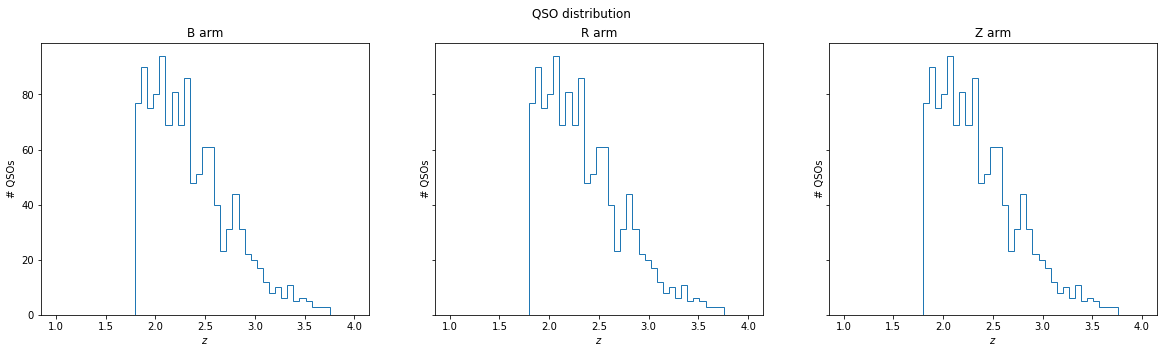

In [34]:
fig9, ax_array = plt.subplots(1,3, sharex=False, sharey=True, figsize=(20,5))
ax1, ax2, ax3 = ax_array
B.plot_qso_dist(ax=ax1)
R.plot_qso_dist(ax=ax2)
Z.plot_qso_dist(ax=ax3)
ax1.set_title('B arm')
ax2.set_title('R arm')
ax3.set_title('Z arm')
plt.suptitle('QSO distribution')
plt.show()

/global/homes/c/cramirez/.conda/envs/colore_env/lib/python3.8/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


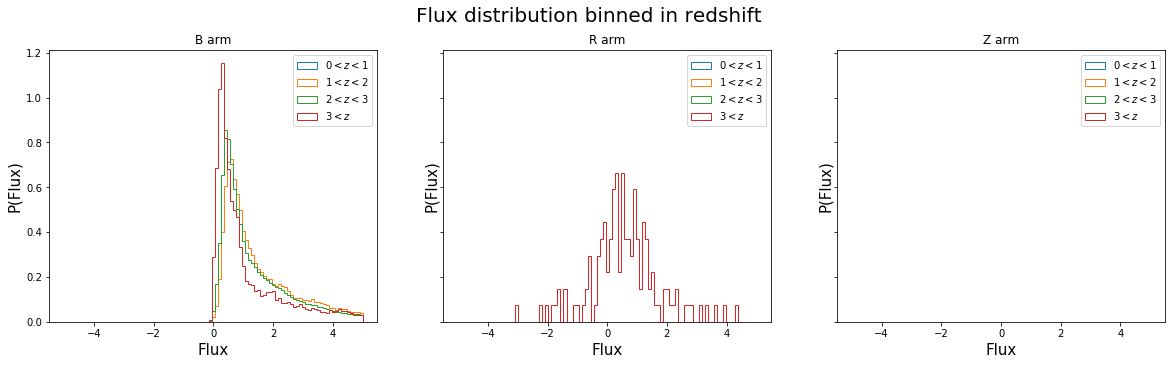

In [35]:
fig3, ax_array = plt.subplots(1,3, sharex=False, sharey=True, figsize=(20,5))
ax1, ax2, ax3 = ax_array
_1 = B.plot_pdf(B.flux, 'Flux', ax=ax1)
_2 = R.plot_pdf(R.flux, 'Flux', ax=ax2)
_3 = Z.plot_pdf(Z.flux, 'Flux', ax=ax3)
ax1.set_title('B arm')
ax2.set_title('R arm')
ax3.set_title('Z arm')
for ax in [ax1,ax2,ax3]:
    ax.set_xlabel('Flux', fontsize=15)
    ax.set_ylabel('P(Flux)', fontsize=15)
plt.suptitle('Flux distribution binned in redshift', fontsize=20, y=1)
plt.show()

In [36]:
B.flux

array([[ 5.4398384 ,  4.371949  ,  2.6449516 , ...,  3.5840194 ,
         2.781306  ,  3.1494095 ],
       [ 0.30399302,  0.39695606,  0.2419238 , ..., -0.01814639,
        -0.15813322,  0.7361544 ],
       [ 1.4533383 ,  1.4791924 ,  1.5517716 , ...,  0.2188663 ,
        -0.3418561 ,  0.50497013],
       ...,
       [ 0.23937963,  0.31545195,  0.5388435 , ..., -0.20375706,
         0.7980775 ,  0.94106305],
       [ 1.4032705 ,  1.4769831 ,  1.3106394 , ...,  1.863961  ,
         1.5296623 ,  1.41316   ],
       [ 1.0757921 ,  2.0852866 ,  2.747199  , ...,  2.306936  ,
         2.55443   ,  2.46555   ]], dtype=float32)

@ Negative values of Flux???

In [37]:
mockid = 0

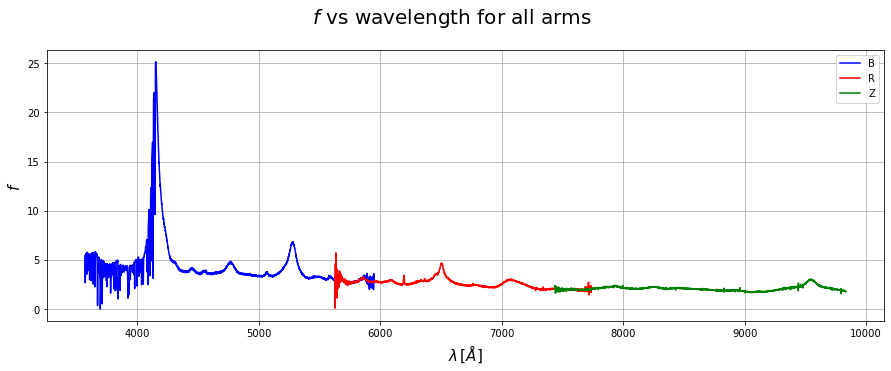

In [38]:
fig4, ax_array = plt.subplots(1,1, sharex=False, sharey=True, figsize=(15,5))
ax1 = ax_array
_1 = B.single_skewer(B.flux, B.wavelength, ax=ax1, mockid=mockid, c='b', label='B')
_2 = R.single_skewer(R.flux, R.wavelength, ax=ax1, mockid=mockid, c='r', label='R')
_3 = Z.single_skewer(Z.flux, Z.wavelength, ax=ax1, mockid=mockid, c='g', label='Z')
ax1.grid()
ax1.set_ylabel('$f$', fontsize=15)
ax1.set_xlabel('$ \lambda \, [\AA]$', fontsize=15)
plt.suptitle('$f$ vs wavelength for all arms', fontsize=20, y=1)
ax1.legend()
plt.show()

### Different configurations QuickQuasars

In [39]:
print(q1,"\n",q2,"\n",q3,"\n",q4)

QuickQuasars sim. Id: 8	Name: normal	Path: /global/cscratch1/sd/cramirez/reproduce_london/QuickQuasars/normal 
 QuickQuasars sim. Id: 6	Name: no_transmission	Path: /global/cscratch1/sd/cramirez/reproduce_london/QuickQuasars/no_transmission 
 QuickQuasars sim. Id: 7	Name: noisy	Path: /global/cscratch1/sd/cramirez/reproduce_london/QuickQuasars/noisy 
 QuickQuasars sim. Id: 9	Name: 5_exposures	Path: /global/cscratch1/sd/cramirez/reproduce_london/QuickQuasars/5_exposures


In [40]:
B1 = q1.get_spectra(arm='b')
B2 = q2.get_spectra(arm='b')
B3 = q3.get_spectra(arm='b')
B4 = q4.get_spectra(arm='b')

In [41]:
mockid = 44512

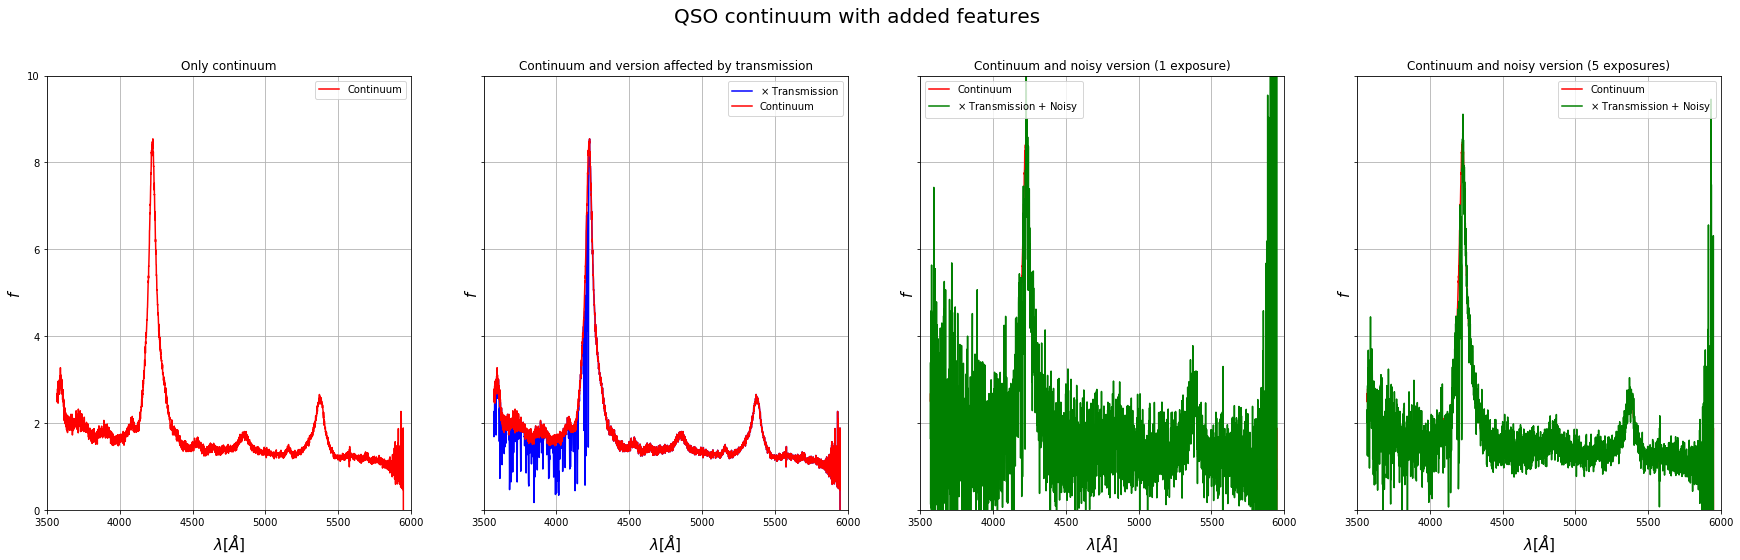

In [42]:
fig4, ax_array = plt.subplots(1,4, sharex=False, sharey=True, figsize=(30,8))
ax1, ax2, ax3,ax4 = ax_array

_1 = B1.single_skewer(B1.flux, B1.wavelength, ax=ax2, mockid=mockid, c='b', label='$\\times$ Transmission')
_2 = B2.single_skewer(B2.flux, B2.wavelength, ax=ax1, mockid=mockid, c='r', label='Continuum')
_2 = B2.single_skewer(B2.flux, B2.wavelength, ax=ax2, mockid=mockid, c='r', label='Continuum')
_2 = B2.single_skewer(B2.flux, B2.wavelength, ax=ax3, mockid=mockid, c='r', label='Continuum')
_3 = B3.single_skewer(B3.flux, B3.wavelength, ax=ax3, mockid=mockid, c='g', label='$\\times$ Transmission + Noisy')
_2 = B2.single_skewer(B2.flux, B2.wavelength, ax=ax4, mockid=mockid, c='r', label='Continuum')
_4 = B3.single_skewer(B4.flux, B4.wavelength, ax=ax4, mockid=mockid, c='g', label='$\\times$ Transmission + Noisy')

ax1.set_title('Only continuum')
ax2.set_title('Continuum and version affected by transmission')
ax3.set_title('Continuum and noisy version (1 exposure)')
ax4.set_title('Continuum and noisy version (5 exposures)')
for ax in ax_array:
    ax.grid()
    ax.set_xlim(3500,6000)
    ax.set_ylabel('$f$', fontsize=15)
    ax.set_xlabel('$ \lambda [\AA]$', fontsize=15)
    ax.set_ylim(0,10)
    ax.legend()
plt.suptitle('QSO continuum with added features', y=1, fontsize=20)
plt.show()

## LyaCoLoRe + QuickQuasars

In [43]:
mockid = 64467
mockid_quickquasars = 64467

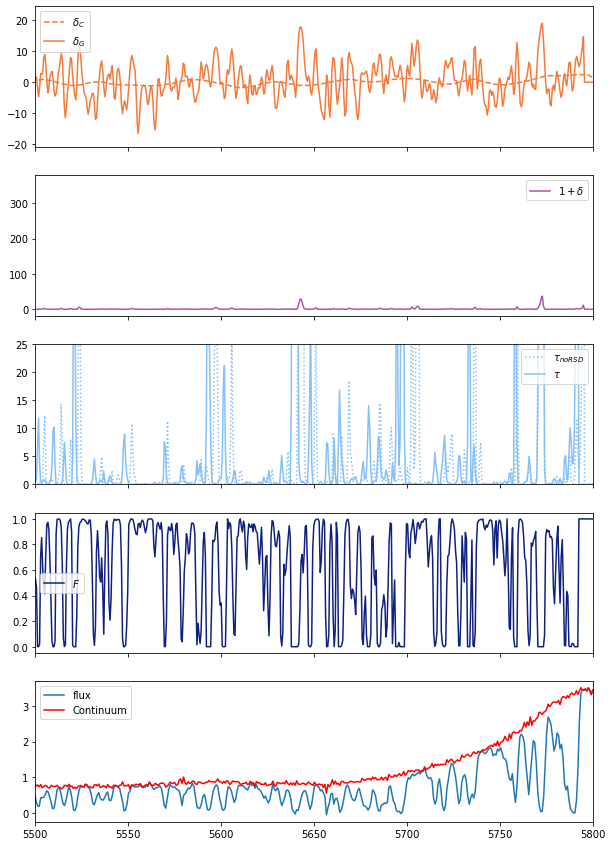

In [44]:
fig, ax_array = plt.subplots(5,1 , sharex=True, sharey=False, figsize=(10,15))
ax1, ax2, ax3,ax4, ax5 = ax_array
a.single_skewer(a.values, a.wavelength, ax=ax1, mockid = mockid, **a.style)
b.single_skewer(b.values, b.wavelength, ax=ax1, mockid = mockid, **b.style)
c.single_skewer(c.values, c.wavelength, ax=ax2, mockid = mockid, **c.style)
d.single_skewer(d.values, d.wavelength, ax=ax3, mockid = mockid, **d.style)
e.single_skewer(e.values, e.wavelength, ax=ax3, mockid = mockid, **e.style)
g.single_skewer(g.values, g.wavelength, ax=ax4, mockid = mockid, **g.style)
B1.single_skewer(B1.flux,B1.wavelength, ax=ax5, mockid = mockid_quickquasars, label='flux')
B2.single_skewer(B2.flux, B2.wavelength, ax=ax5, mockid=mockid_quickquasars, c='r', label='Continuum')



ax1.set_xlim(5500,5800)
ax3.set_ylim(0,25)
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
plt.savefig('tmp.png')